<div class="alert alert-block alert-info">
    <b style="font-size:30px"> <center>Predicting Students’ Performance</center></b>
    
### Data Source: 
    - An open-access dataset from the repository of Optimized Computing and Communications (OC2) used previously as lab work on student prediction in eLearning environments using machine learning methods.
    
### Data Attributes:
    - Id Student      Id                  Nominal Std000-485
    - Quiz01          Quiz1 Score         Numeric 0-10
    - Assign01        Assignment1 Score   Numeric 0-8
    - Midterm         Midterm Score       Numeric 0-20
    - Assign02        Assignment2 Score   Numeric 0-12
    - Assign03        Assignment3 Score   Numeric 0-25
    - Final Exam      Final Exam Score    Numeric 0-35
    - Final Grade     Final Grade Score   Numeric 0-100
    -Total            Final Grade         Nominal G, F, W
    
    1. Good (G) – course grade of the student is between 70-100%
    2. Fair (F) - course grade of the student is between 51-69%
    3. Weak (W) - course grade of the student is between <50%

### Goal:    
    - Prediction using machine learning techniques has enormous potential to assist faculty in identifying student poor performance by enabling an early warning system, This effort usually leads to early detection of at-risk students,       enhanced academic achievement, identification of weak learners, and trimming down of failure rates.
</div>

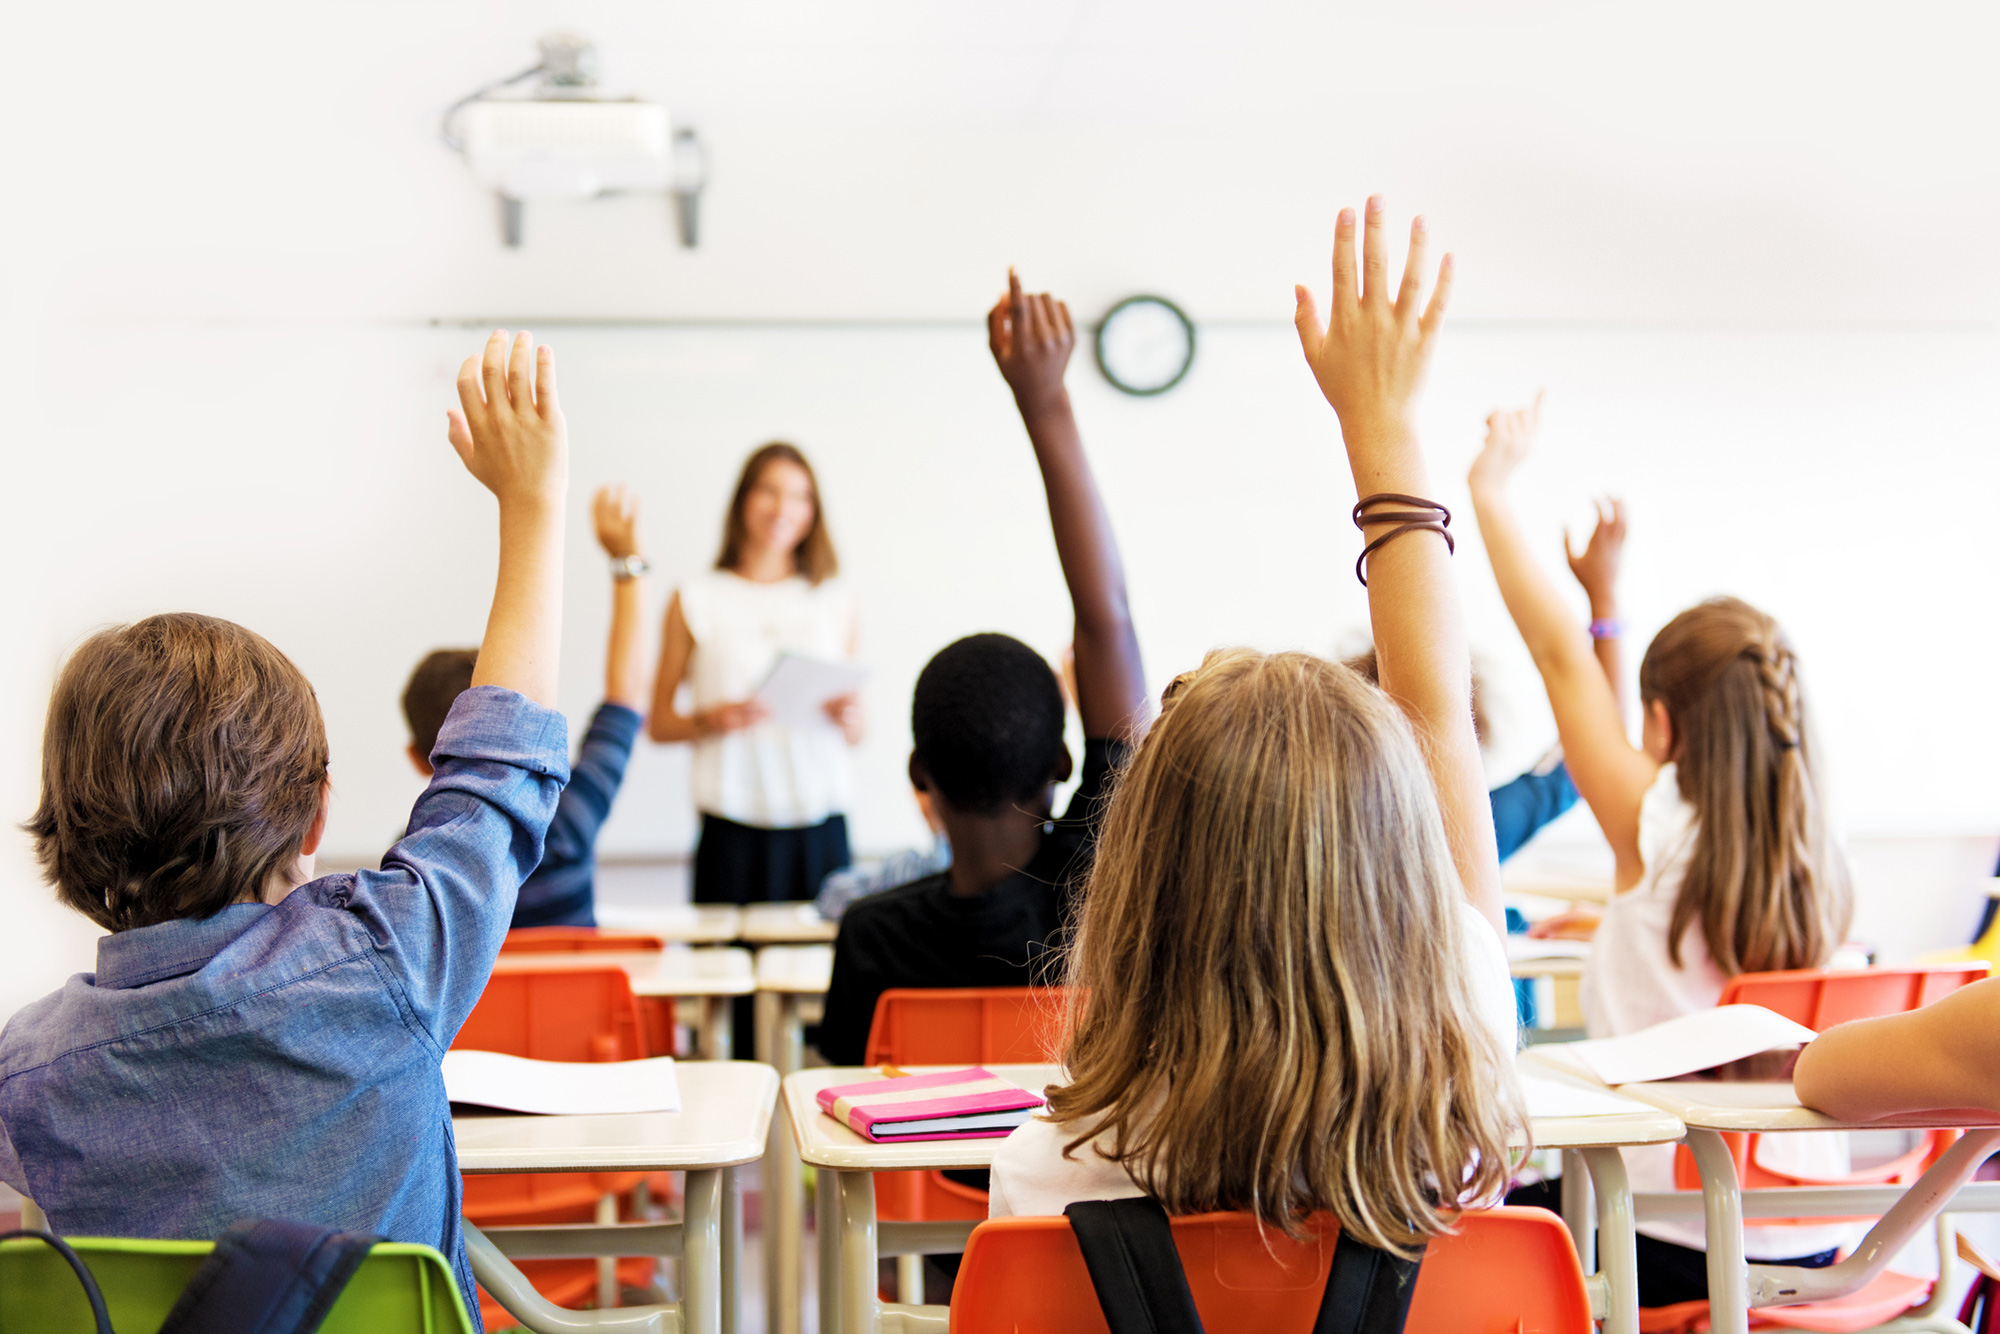

<div class="alert alert-block alert-info">
<b style="font-size:20px"> Import Libraries: </b> </div>

In [33]:
import numpy as np # NumPy is a Python library used for working with
import pandas as pd # Pandas is mainly used for data analysis. Pandas
import seaborn as sns # Seaborn is a library in Python predominantly us
import plotly.express as px # Plotly's Python graphing library makes interactive, publication-quality graphs.
from sklearn import metrics # The sklearn. metrics module implements several loss, score, and utility functions to measure classification performance. Some metrics might require probability estimates of the positive class, confidence values, or binary decisions values.
import matplotlib.pyplot as plt # Matplotlib is a cross-platform, data visualization
from sklearn import preprocessing # Scikit-learn is probably the most useful library for machine learning in Python.
import missingno as msno # It's also the name of a Python library for the exploratory visualization of missing data.
from collections import Counter # It returns dictionary format, with key/value pair where the key is the element and value is the count.
from imblearn.over_sampling import SMOTE # It is a statistical technique for increasing the number of cases in your dataset in a balanced way
from sklearn.metrics import accuracy_score # In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.
from sklearn.neural_network import MLPClassifier # MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network.
from sklearn.model_selection import GridSearchCV # GridSearchCV is a function that comes in Scikit-learn's(or SK-learn) model_selection package. This function helps to loop through predefined hyperparameters and fit your estimator (model) on your training set.
from sklearn.neighbors import KNeighborsClassifier # The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier
from sklearn.model_selection import train_test_split # It is a method used to split our data into train and test sets.

In [34]:
# Loading the data from csv file to a Pandas DataFrame
dfBinary = pd.read_csv('Student Performance Prediction-Binary.csv')
dfMultiClass = pd.read_csv('Student Performance Prediction-Multi.csv')
dfMultiClass_ = pd.read_csv('Student Performance Prediction-Multi.csv')

In [35]:
dfClass_G = dfMultiClass[dfMultiClass['Class'] == 'G']
dfClass_W = dfMultiClass[dfMultiClass['Class'] == 'W']
dfClass_F = dfMultiClass[dfMultiClass['Class'] == 'F']

In [36]:
X = dfMultiClass.drop(['Class','Student ID'], axis=1)
y = dfMultiClass['Class']

<div class="alert alert-block alert-info">
<b style="font-size:30px"> EDA : </b>
    
    • EDA is important to discover the data , find the relation between variables and gain some insights.
    • It will give you a fundamental understanding of the data such as its distribution, null values , outliers etc ....
    • From EDA, We can ask questions that impact business.
    • EDA can be graphical or non-graphical. Each method is either univariate, bivariate or multivariate.
    • In the non-graphical: By using functions such as isnull, info, datatypes, shape, describe and more....
    • In the graphical approach: By using libraries such as scatter, box, bar, density and correlation plots.
    --------------------------------
    • There are 3 types of EDA:

    
    1. Univariate Analysis:
        - It is simple way to analyze data. 
        - We analyze one variable , find its distribution , make observation about it and find outliers etc...
        --------------------------------
    2. Bivariate Analysis:
        - This anlysis is related to find the relation between 2 variables , there are 3 types of bivariate analysis:
            1. Numerical-Numerical.
            2. Categorical-Categorical.
            3. Numerical-Categorical.
        --------------------------------
    3. Multivariate Analysis:
        - This anlysis is related to find the relation between more than 2 variables
        --------------------------------
</div>

In [37]:
print(f"Class G is {dfClass_G.shape[0]}\nClass W is {dfClass_W.shape[0]}\nClass F is {dfClass_F.shape[0]}")

Class G is 419
Class W is 8
Class F is 59


In [38]:
# First 10 rows of the dataframe
dfMultiClass.head(10)

,Student ID,Quiz01 [10],Assignment01 [8],Midterm Exam [20],Assignment02 [12],Assignment03 [25],Final Exam [35],Course Grade,Total [100],Class
0,student000000,95,91,70,90,84,64,85,85,G
1,student000001,85,76,65,61,73,64,76,76,G
2,student000002,85,41,73,61,73,61,73,73,G
3,student000003,80,78,80,79,79,57,80,79,G
4,student000004,85,91,78,80,84,67,85,85,G
5,student000005,80,79,83,87,82,60,83,83,G
6,student000006,70,91,80,81,79,73,85,85,G
7,student000007,75,65,63,71,78,31,64,64,F
8,student000008,80,87,85,88,89,59,85,85,G
9,student000009,70,68,85,91,82,71,86,86,G


In [39]:
# Columns of data
dfMultiClass.columns

Index(['Student ID', 'Quiz01 [10]', 'Assignment01 [8]', 'Midterm Exam [20]',
       'Assignment02 [12]', 'Assignment03 [25]', 'Final Exam [35]',
       'Course Grade', 'Total [100]', 'Class'],
      dtype='object')

In [40]:
# Getting some informations about the dataset
dfMultiClass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Student ID         486 non-null    object
 1   Quiz01 [10]        486 non-null    int64 
 2   Assignment01 [8]   486 non-null    int64 
 3   Midterm Exam [20]  486 non-null    int64 
 4   Assignment02 [12]  486 non-null    int64 
 5   Assignment03 [25]  486 non-null    int64 
 6   Final Exam [35]    486 non-null    int64 
 7   Course Grade       486 non-null    int64 
 8   Total [100]        486 non-null    int64 
 9   Class              486 non-null    object
dtypes: int64(8), object(2)
memory usage: 38.1+ KB


In [41]:
# Number of rows and columns
dfMultiClass.shape

(486, 10)

In [42]:
# The duplicated() method returns a Series with True and False values that describe which rows in the DataFrame are duplicated and not.
dfMultiClass.duplicated().sum()

0

In [43]:
# Show number of distinctive values for each coulmns
dfMultiClass.apply(lambda x:len(x.unique()))

Student ID           486
Quiz01 [10]           15
Assignment01 [8]      62
Midterm Exam [20]     25
Assignment02 [12]     52
Assignment03 [25]     51
Final Exam [35]       46
Course Grade          55
Total [100]           56
Class                  3
dtype: int64

In [44]:
# The describe() method returns description of the data in the DataFrame.
dfMultiClass.describe()

,Quiz01 [10],Assignment01 [8],Midterm Exam [20],Assignment02 [12],Assignment03 [25],Final Exam [35],Course Grade,Total [100]
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,77.901235,75.479424,77.109053,77.133745,80.870370,62.181070,80.382716,80.487654
std,13.683406,17.733496,11.987383,15.179633,12.986498,14.938642,11.267032,11.282449
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,15.000000
25%,70.000000,68.250000,70.000000,72.000000,77.000000,53.000000,75.000000,75.000000
50%,80.000000,79.000000,80.000000,81.000000,83.000000,64.000000,83.000000,83.000000
75%,85.000000,87.000000,85.000000,87.000000,89.000000,73.000000,88.000000,88.000000
max,100.000000,99.000000,98.000000,97.000000,100.000000,93.000000,100.000000,102.000000


In [45]:
# Drop this column as it is not useful in prediction
dfMultiClass.drop(columns=['Student ID'],inplace=True)

<div class="alert alert-block alert-info">
<b style="font-size:20px"> Insights</b>
    
    1. Rows of data are small (486 row).
    ---
    2. All featues of the dataset are numerical & Target is categorical.
    ---
    3. There is no duplication in data.
    ---
    4. There is no null values in data.
    ---
    5. Mean value of the student is high. The highest is Assignment03 & The least is Final Exam.
    ---
    6. Data is highly imbalanced (Target => (G) is 419, (W) is 8, (F) is 59)
</div>

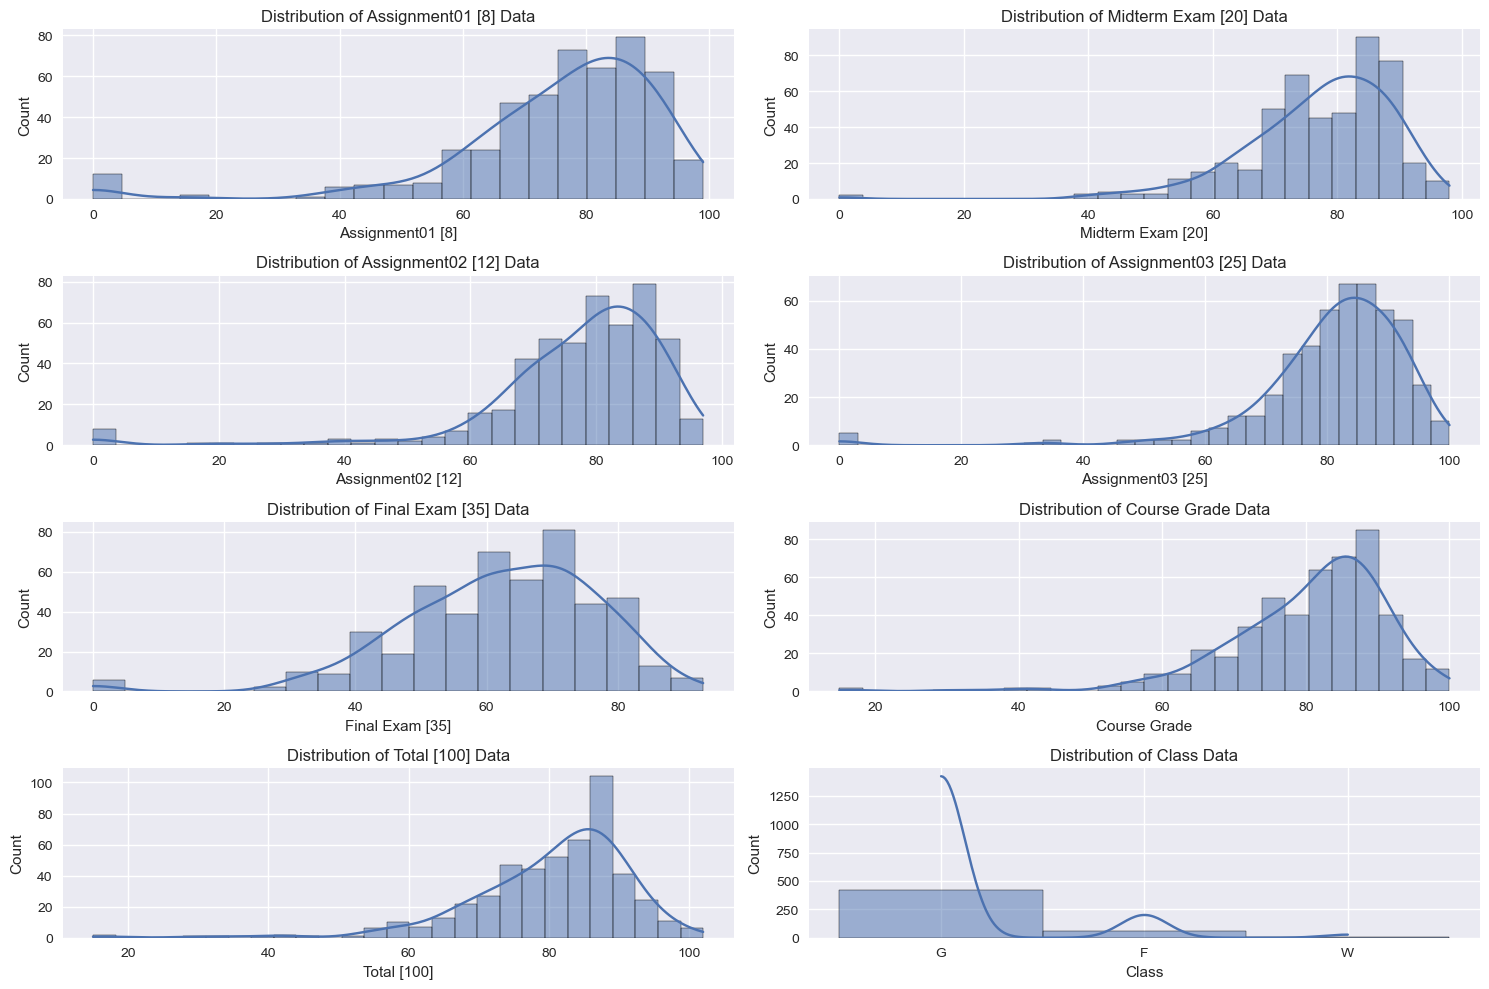

In [46]:
# Grades Distribution
X = dfMultiClass.iloc[:,[1,2,3,4,5,6,7,8]]
plt.figure(figsize=(15,10))
for i,col in enumerate(X.columns,1):
    plt.subplot(4,2,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(X[col],kde=True)
    plt.tight_layout()
    plt.plot()

Text(0.5, 0, 'Final Exam [35]')

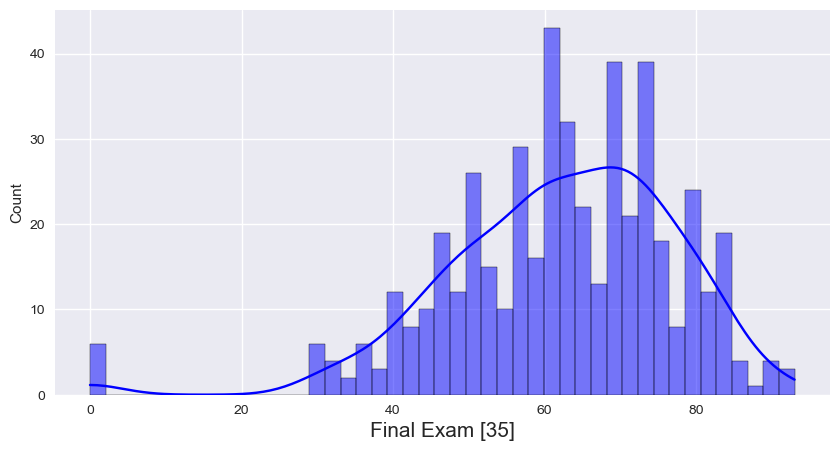

In [47]:
# Distrbution of final grade.
plt.style.use("seaborn")
fig, ax =plt.subplots(1,1, figsize=(10,5))
sns.histplot(dfMultiClass["Final Exam [35]"], ax=ax, color="blue", bins=45, kde=True)
ax.set_xlabel("Final Exam [35]",fontsize=15)

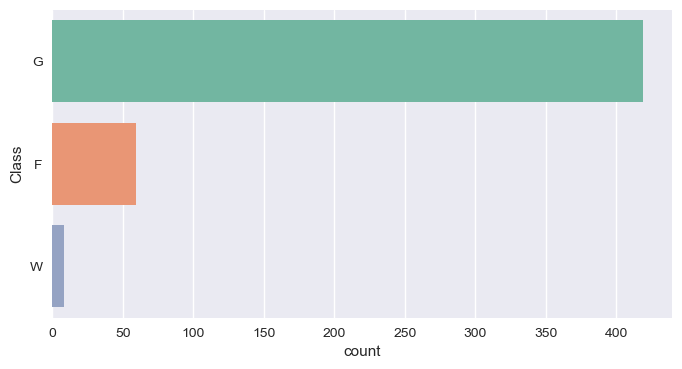

In [48]:
# We can also plot attribute Class
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(y="Class", data=dfMultiClass, palette="Set2")
plt.show()

<AxesSubplot:xlabel='Quiz01 [10]', ylabel='Assignment03 [25]'>

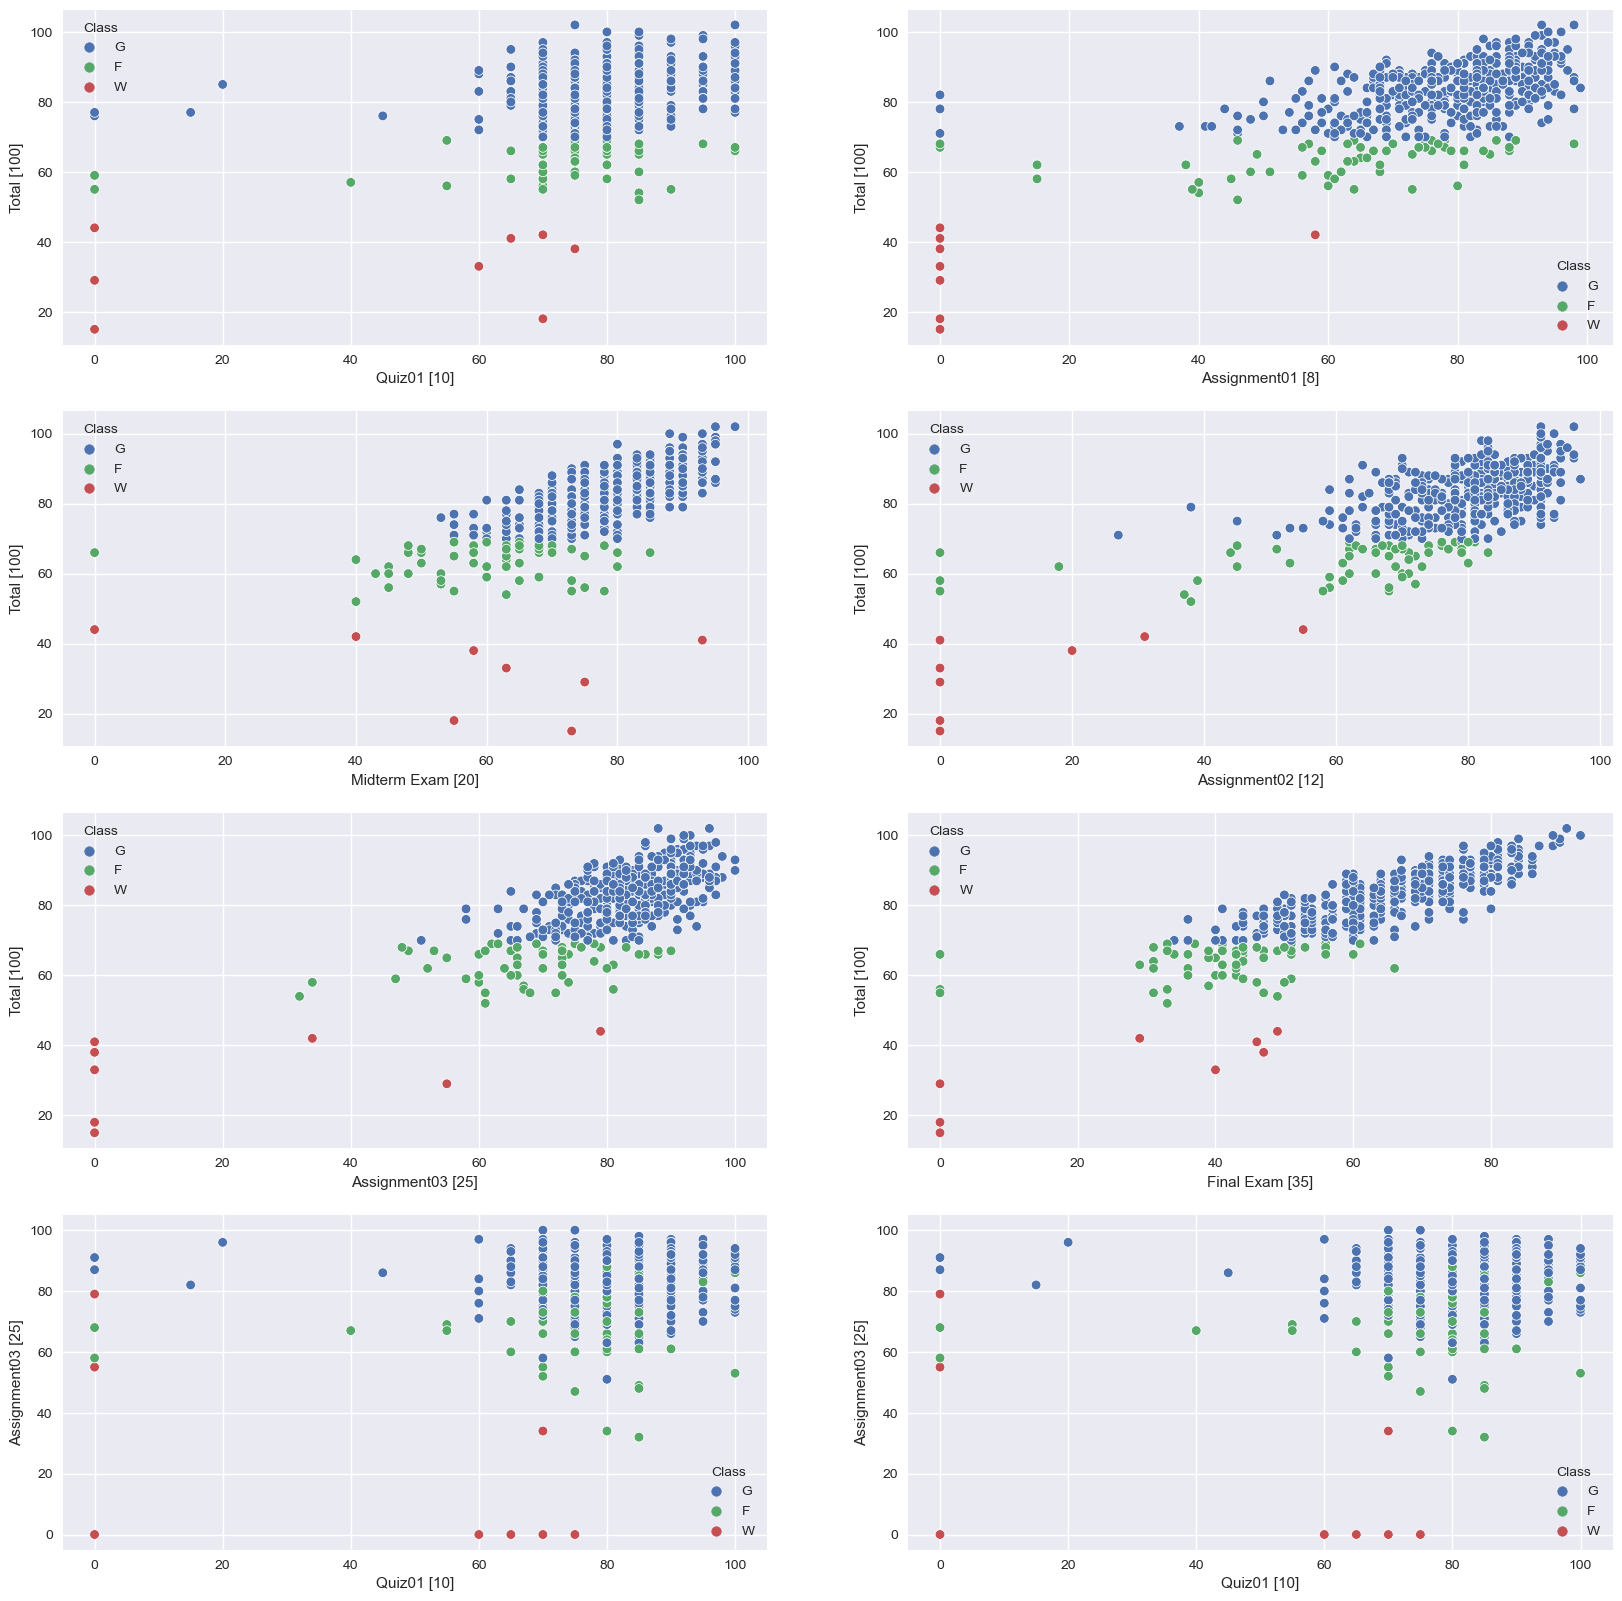

In [49]:
# Plot this scatterplot to to observe relationship between variables. 
fig, ax = plt.subplots(4,2, figsize=(20,20))
sns.scatterplot(data = dfMultiClass, x ='Quiz01 [10]', y = 'Total [100]', hue = 'Class',ax=ax[0,0])
sns.scatterplot(data = dfMultiClass, x ='Assignment01 [8]', y = 'Total [100]', hue = 'Class',ax=ax[0,1]) 
sns.scatterplot(data = dfMultiClass, x ='Midterm Exam [20]', y = 'Total [100]', hue = 'Class',ax=ax[1,0]) 
sns.scatterplot(data = dfMultiClass, x ='Assignment02 [12]', y = 'Total [100]', hue = 'Class',ax=ax[1,1])
sns.scatterplot(data = dfMultiClass, x ='Assignment03 [25]', y = 'Total [100]', hue = 'Class',ax=ax[2,0])
sns.scatterplot(data = dfMultiClass, x ='Final Exam [35]', y = 'Total [100]', hue = 'Class',ax=ax[2,1]) 
sns.scatterplot(data = dfMultiClass, x ='Quiz01 [10]', y = 'Assignment03 [25]', hue = 'Class',ax=ax[3,0])
sns.scatterplot(data = dfMultiClass, x ='Quiz01 [10]', y = 'Assignment03 [25]', hue = 'Class',ax=ax[3,1])

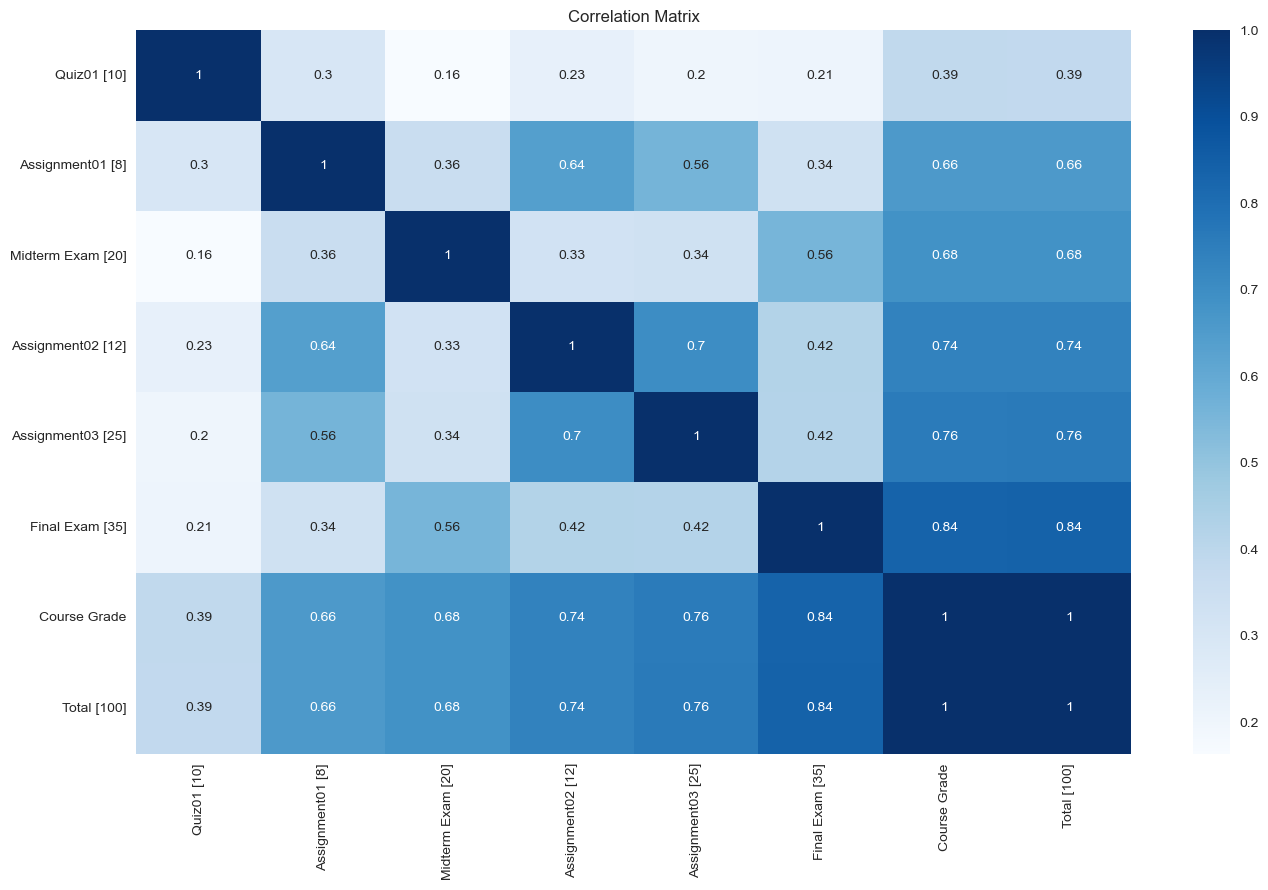

In [50]:
# The correlation matrix helps to predict the evolution of the relationship between the variables. 
# The correlation matrix allows you to have a global view of the more or less strong relationship between several variables.
plt.figure(figsize=(14,9))
sns.heatmap(dfMultiClass.corr(),annot=True,cmap='Blues');
plt.title('Correlation Matrix');
plt.tight_layout()

<div class="alert alert-block alert-info">
<b style="font-size:20px"> Insights</b>
    
    1. Data features are highly left skewed.
    ---
    2. Student grades are normalized between 0 and 100.
    ---
    3. Almost all students' grades range between [40:100].
    ---
    4. There is high correlation between (Final Exam & Student's Class) this can be detected using visulization.
        We can conclude that final grade affect the student class.
        Assignments have close correlation to Course grade.
</div>

<div class="alert alert-block alert-info">
<b style="font-size:20px"> Dealing with Imbalanced data: </b> 
    
    
    - A classification data set with skewed class proportions is called imbalanced.
    
    - Classes that make up a large proportion of the data set are called majority classes. Those that make up a smaller proportion are minority classes.
    
    - Imbalanced data is a common problem in machine learning, which brings challenges to feature correlation, class 
    separation and evaluation, and results in poor model performance.

</div>

<div class="alert alert-block alert-info">
<b style="font-size:20px"> 1-SMOTE  </b> 
    
    - This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority 
    Oversampling Technique, or SMOTE for short.
    
    - SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.
    
    - Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that 
    example are found (typically k=5). 
    
    - A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.
    
 ##### Types of Imbalancing:
    
    1. Under-Sampling.
    2. Over-Sampling.
</div>

In [28]:
X = dfMultiClass.drop(columns=["Class"]) # Features
Y = dfMultiClass["Class"] # Target

### `1- Use smote method with different random state and create 10 different balanced datasets.`

In [29]:
smotted_datasets = []
for i in [0,1,2,4,7,8,9,30,40,44]:
    smote=SMOTE(random_state=i)
    X_SMOTE,Y_SMOTE = smote.fit_resample(X,Y)
    Y_SMOTE.value_counts()
    dfMultiClass_SMOTE = pd.concat([X_SMOTE, Y_SMOTE], axis=1, join='inner')
    smotted_datasets.append(dfMultiClass_SMOTE)

In [30]:
smotted_datasets[1].shape # Dimension of the dataset (Number of rows highly increased due to balancing)

(1257, 9)

### `2- Check if there is duplication in data.`

In [31]:
for i in smotted_datasets:
    print(i.duplicated().sum()) # Total number of duplicated rows

68
64
69
77
58
69
77
72
65
62


### `3- Drop duplication.`

In [32]:
for i in range(len(smotted_datasets)):
    smotted_datasets[i]= (smotted_datasets[i]).drop_duplicates() # Drop all duplicates from the datasets

In [481]:
for i in smotted_datasets:
    print(i.duplicated().sum()) # Total number of duplicated rows

0
0
0
0
0
0
0
0
0
0


### `4- I want to choose the dataset that is most similar to the original dataset.`
        I use mean to determine this.

In [482]:
dfClass_G.describe()

,Quiz01 [10],Assignment01 [8],Midterm Exam [20],Assignment02 [12],Assignment03 [25],Final Exam [35],Course Grade,Total [100]
count,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000
mean,79.116945,78.582339,79.787589,80.491647,83.768496,65.804296,83.675418,83.780430
std,11.331591,13.340401,8.740558,9.361011,7.750991,11.362655,6.860165,6.889038
min,0.000000,0.000000,53.000000,27.000000,51.000000,34.000000,70.000000,70.000000
25%,72.500000,71.500000,74.000000,75.000000,79.000000,59.000000,79.000000,79.000000
50%,80.000000,81.000000,80.000000,82.000000,84.000000,66.000000,84.000000,84.000000
75%,85.000000,88.000000,88.000000,87.000000,90.000000,74.000000,89.000000,89.000000
max,100.000000,99.000000,98.000000,97.000000,100.000000,93.000000,100.000000,102.000000


In [483]:
dfClass_F.describe()

,Quiz01 [10],Assignment01 [8],Midterm Exam [20],Assignment02 [12],Assignment03 [25],Final Exam [35],Course Grade,Total [100]
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,74.067797,62.694915,60.796610,61.949153,68.406780,41.305085,63.508475,63.610169
std,17.031274,20.455380,13.392973,19.103551,12.054644,12.590711,4.706462,4.686801
min,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000,51.000000,52.000000
25%,70.000000,56.000000,53.000000,60.000000,61.500000,36.000000,60.000000,60.000000
50%,75.000000,65.000000,63.000000,68.000000,70.000000,43.000000,66.000000,66.000000
75%,80.000000,76.000000,69.000000,72.000000,76.000000,49.000000,67.000000,67.000000
max,100.000000,98.000000,85.000000,83.000000,90.000000,66.000000,69.000000,69.000000


In [484]:
dfClass_W.describe()

,Quiz01 [10],Assignment01 [8],Midterm Exam [20],Assignment02 [12],Assignment03 [25],Final Exam [35],Course Grade,Total [100]
count,8.00000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,42.50000,7.250000,57.12500,13.250000,21.000000,26.375000,32.375000,32.500000
std,35.45621,20.506097,27.91537,20.638037,31.382434,22.683773,10.901343,11.045361
min,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,15.000000,15.000000
25%,0.00000,0.000000,51.25000,0.000000,0.000000,0.000000,26.250000,26.250000
50%,62.50000,0.000000,60.50000,0.000000,0.000000,34.500000,35.500000,35.500000
75%,70.00000,0.000000,73.50000,22.750000,39.250000,46.250000,41.250000,41.250000
max,75.00000,58.000000,93.00000,55.000000,79.000000,49.000000,43.000000,44.000000


In [485]:
dfClass_G.shape

(419, 10)

In [486]:
#                       Quiz1        Assi1      Midterm     Assi2       Assi3       Final       Course grad Total
# Good Students: mean	79.116945	78.582339	79.787589	80.491647	83.768496	65.804296	83.675418	83.780430
# Fair Students: mean	74.067797	62.694915	60.796610	61.949153	68.406780	41.305085	63.508475	63.610169
# Weak Students: mean	42.50000	7.250000	57.12500	13.250000	21.000000	26.375000	32.375000	32.500000

In [487]:
# I want to choose the balanced dataset that is most similar to the original dataset. So I use the mean to do this

In [488]:
for i in range(10):
    print(f"-------------- Good Students [{i}] --------------")
    print(((smotted_datasets[i])[(smotted_datasets[i])["Class"]=="G"]).mean())
    print(f"-------------- Fair Students [{i}] --------------")
    print(((smotted_datasets[i])[(smotted_datasets[i])["Class"]=="F"]).mean())
    print(f"-------------- Weak Students [{i}] --------------")
    print(((smotted_datasets[i])[(smotted_datasets[i])["Class"]=="W"]).mean())

-------------- Good Students [0] --------------
Quiz01 [10]          79.116945
Assignment01 [8]     78.582339
Midterm Exam [20]    79.787589
Assignment02 [12]    80.491647
Assignment03 [25]    83.768496
Final Exam [35]      65.804296
Course Grade         83.675418
Total [100]          83.780430
dtype: float64
-------------- Fair Students [0] --------------
Quiz01 [10]          74.534826
Assignment01 [8]     63.298507
Midterm Exam [20]    59.179104
Assignment02 [12]    63.266169
Assignment03 [25]    68.967662
Final Exam [35]      41.256219
Course Grade         63.589552
Total [100]          63.703980
dtype: float64
-------------- Weak Students [0] --------------
Quiz01 [10]          48.073370
Assignment01 [8]      8.880435
Midterm Exam [20]    59.513587
Assignment02 [12]    11.258152
Assignment03 [25]    15.241848
Final Exam [35]      26.095109
Course Grade         31.728261
Total [100]          31.785326
dtype: float64
-------------- Good Students [1] --------------
Quiz01 [10]        

C:\Users\Nobita\AppData\Local\Temp\ipykernel_15864\922794449.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(((smotted_datasets[i])[(smotted_datasets[i])["Class"]=="G"]).mean())
C:\Users\Nobita\AppData\Local\Temp\ipykernel_15864\922794449.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(((smotted_datasets[i])[(smotted_datasets[i])["Class"]=="F"]).mean())
C:\Users\Nobita\AppData\Local\Temp\ipykernel_15864\922794449.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  p

In [489]:
# I will choose the second dataset

In [490]:
df_SMOTED = smotted_datasets[1]

C:\Users\Nobita\AppData\Local\Temp\ipykernel_15864\3731862034.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfMultiClass.mean().plot(kind='bar',ax=ax[0],title="Original Dataset",fontsize=20);
C:\Users\Nobita\AppData\Local\Temp\ipykernel_15864\3731862034.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_SMOTED.mean().plot(kind='bar',ax=ax[1],title="Smoted Dataset",fontsize=20);


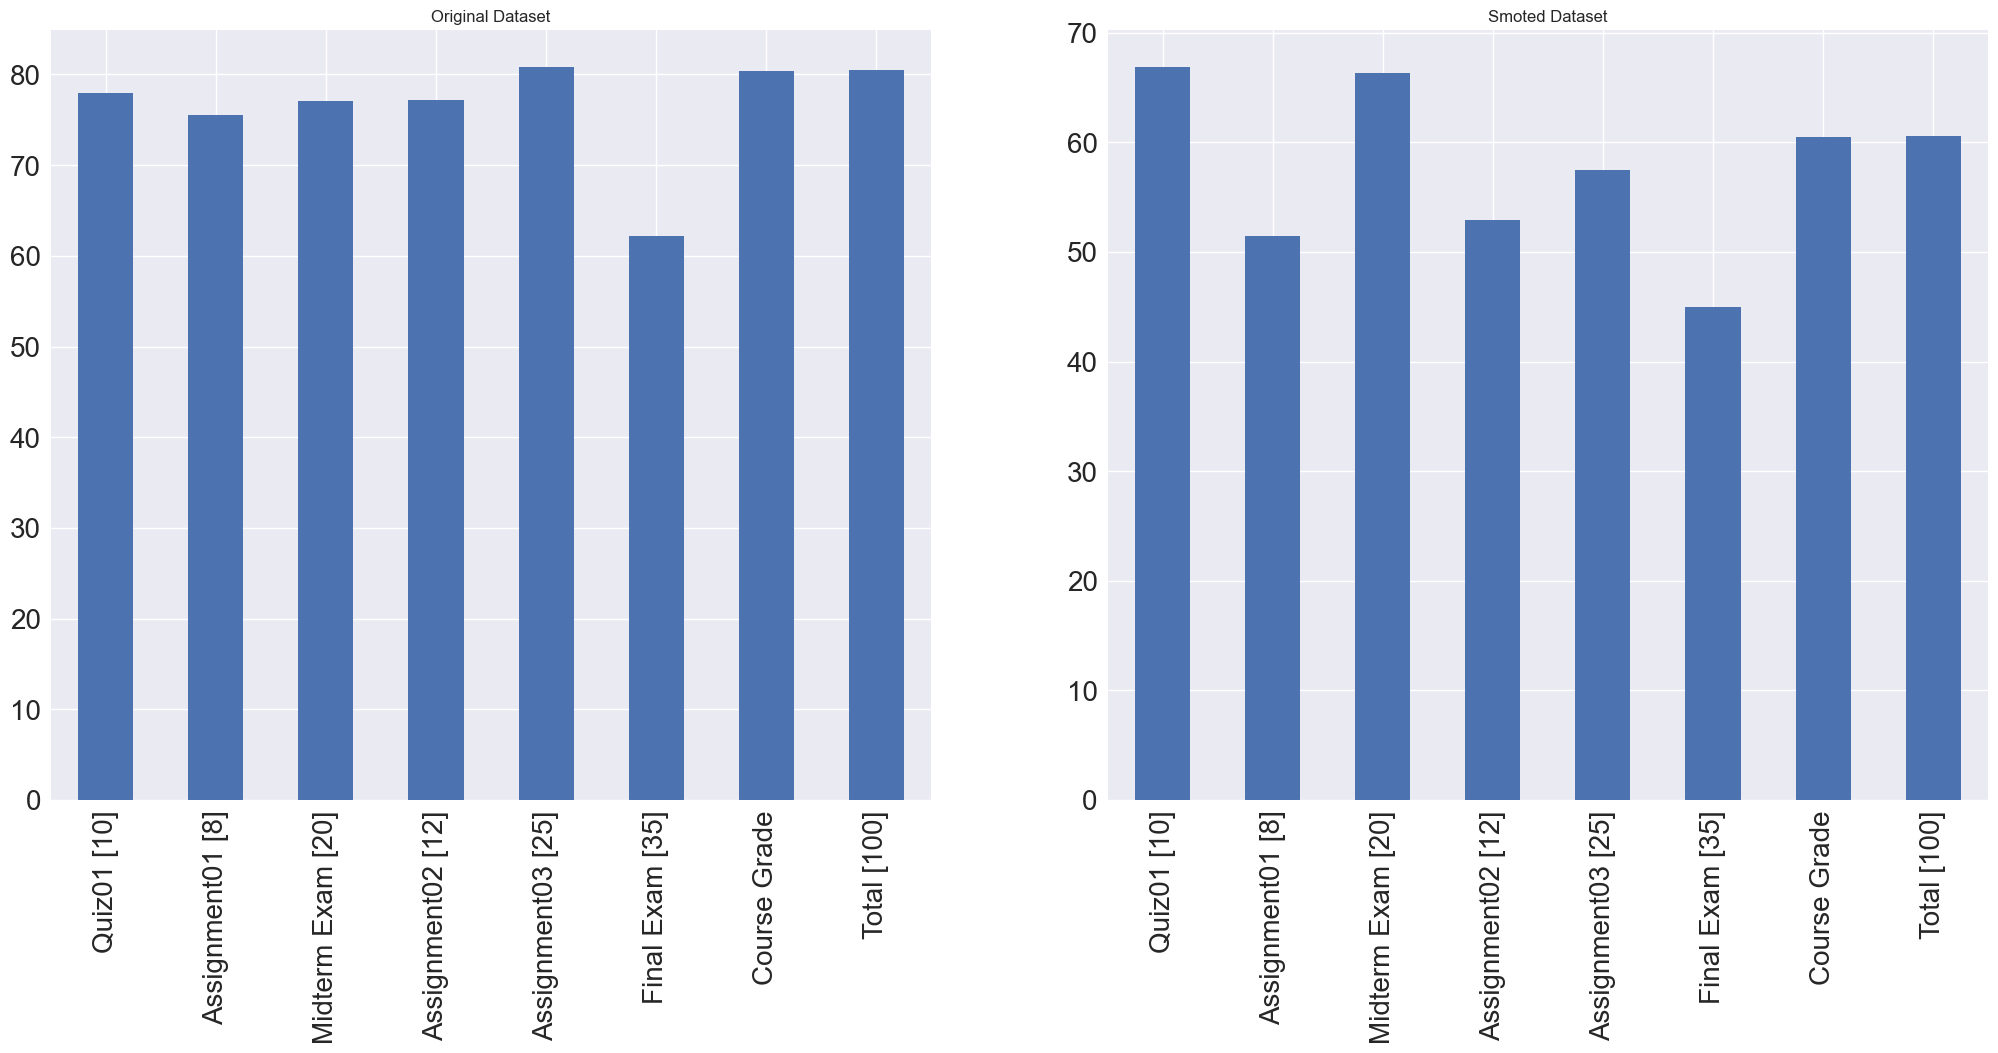

In [491]:
fig, ax = plt.subplots(1,2, figsize=(25,10))
dfMultiClass.mean().plot(kind='bar',ax=ax[0],title="Original Dataset",fontsize=20);
df_SMOTED.mean().plot(kind='bar',ax=ax[1],title="Smoted Dataset",fontsize=20);

C:\Users\Nobita\AppData\Local\Temp\ipykernel_15864\1936819492.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfClass_G.mean().plot(kind='bar',ax=ax[0],title="Original Dataset",fontsize=20);
C:\Users\Nobita\AppData\Local\Temp\ipykernel_15864\1936819492.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_SMOTED[df_SMOTED["Class"]=="G"].mean().plot(kind='bar',ax=ax[1],title="Good Students in Smoted Dataset",fontsize=20);


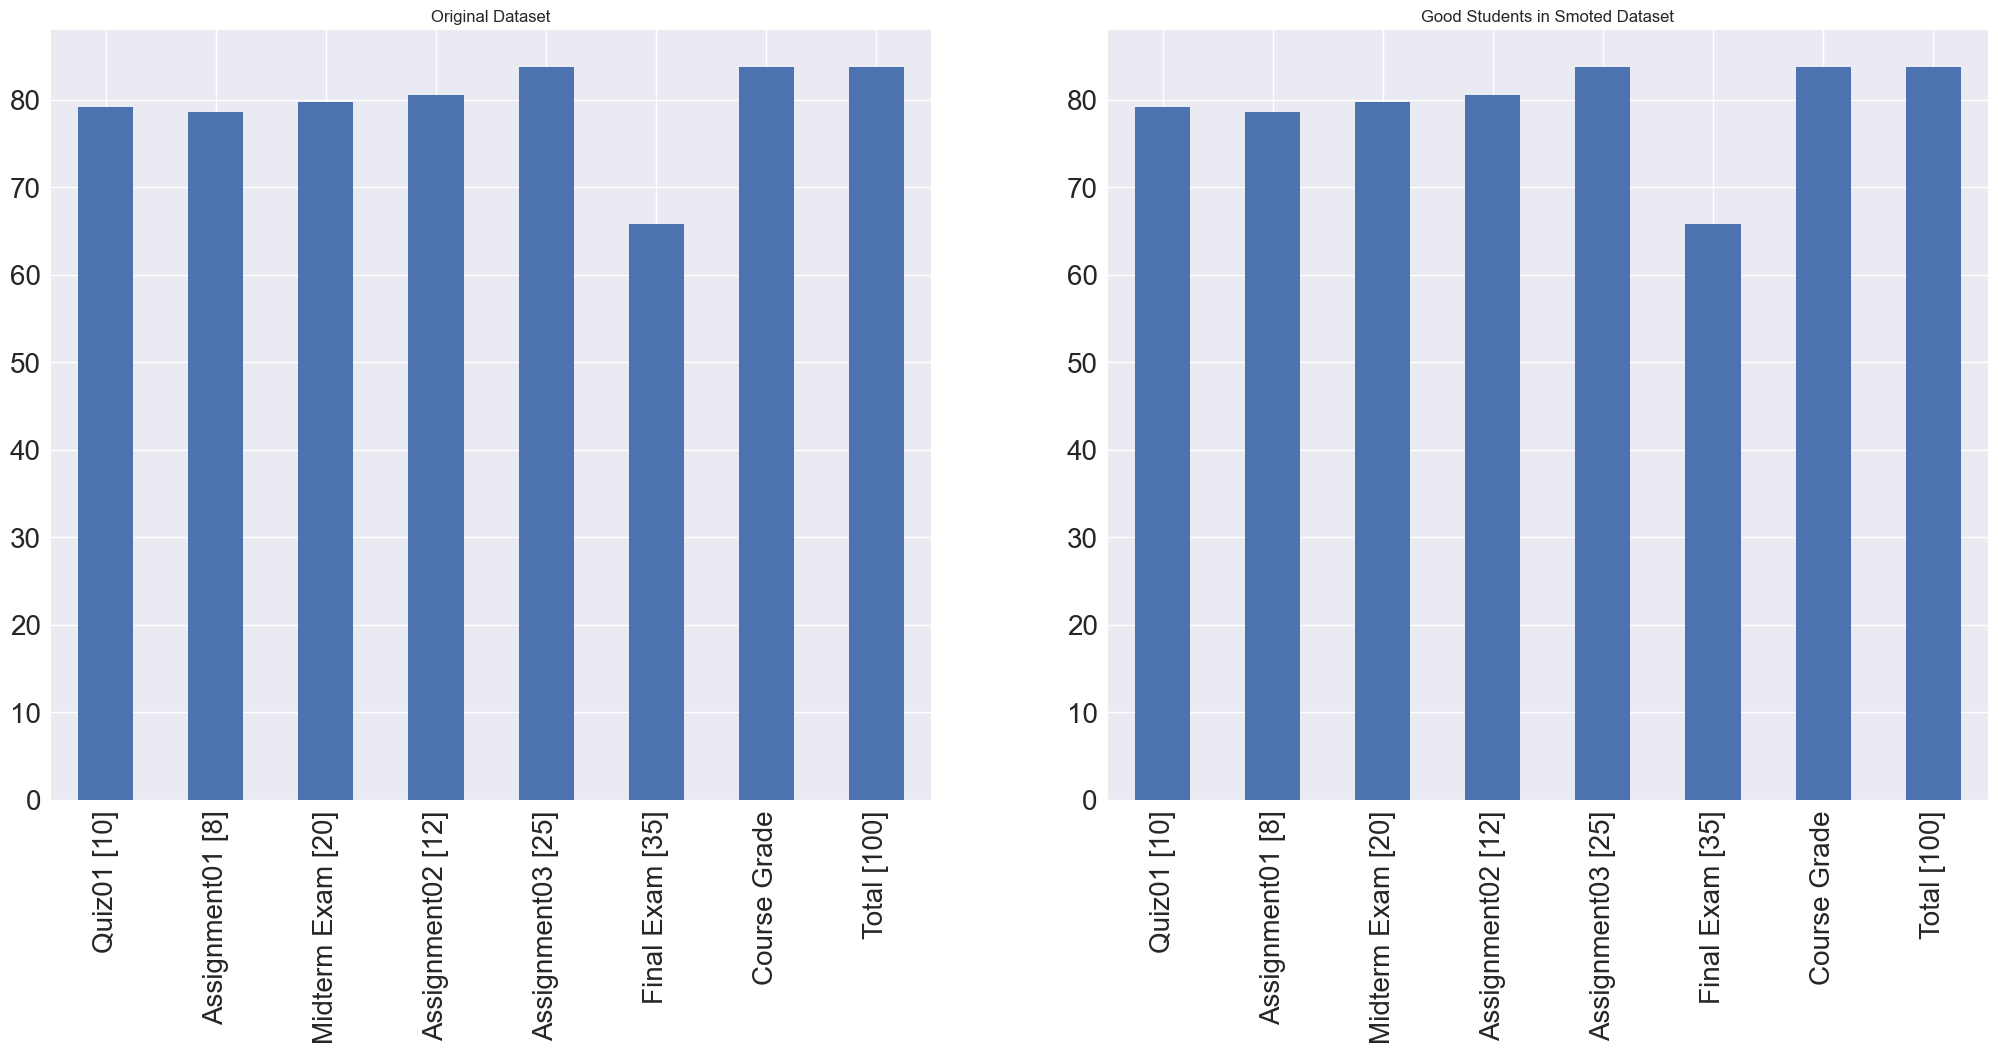

In [327]:
fig, ax = plt.subplots(1,2, figsize=(25,10))
dfClass_G.mean().plot(kind='bar',ax=ax[0],title="Original Dataset",fontsize=20);
df_SMOTED[df_SMOTED["Class"]=="G"].mean().plot(kind='bar',ax=ax[1],title="Good Students in Smoted Dataset",fontsize=20);

C:\Users\Nobita\AppData\Local\Temp\ipykernel_15864\3426912329.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfClass_F.mean().plot(kind='bar',ax=ax[0],title="Original Dataset",fontsize=20);
C:\Users\Nobita\AppData\Local\Temp\ipykernel_15864\3426912329.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_SMOTED[df_SMOTED["Class"]=="F"].mean().plot(kind='bar',ax=ax[1],title="Fair Students in Smoted Dataset",fontsize=20);


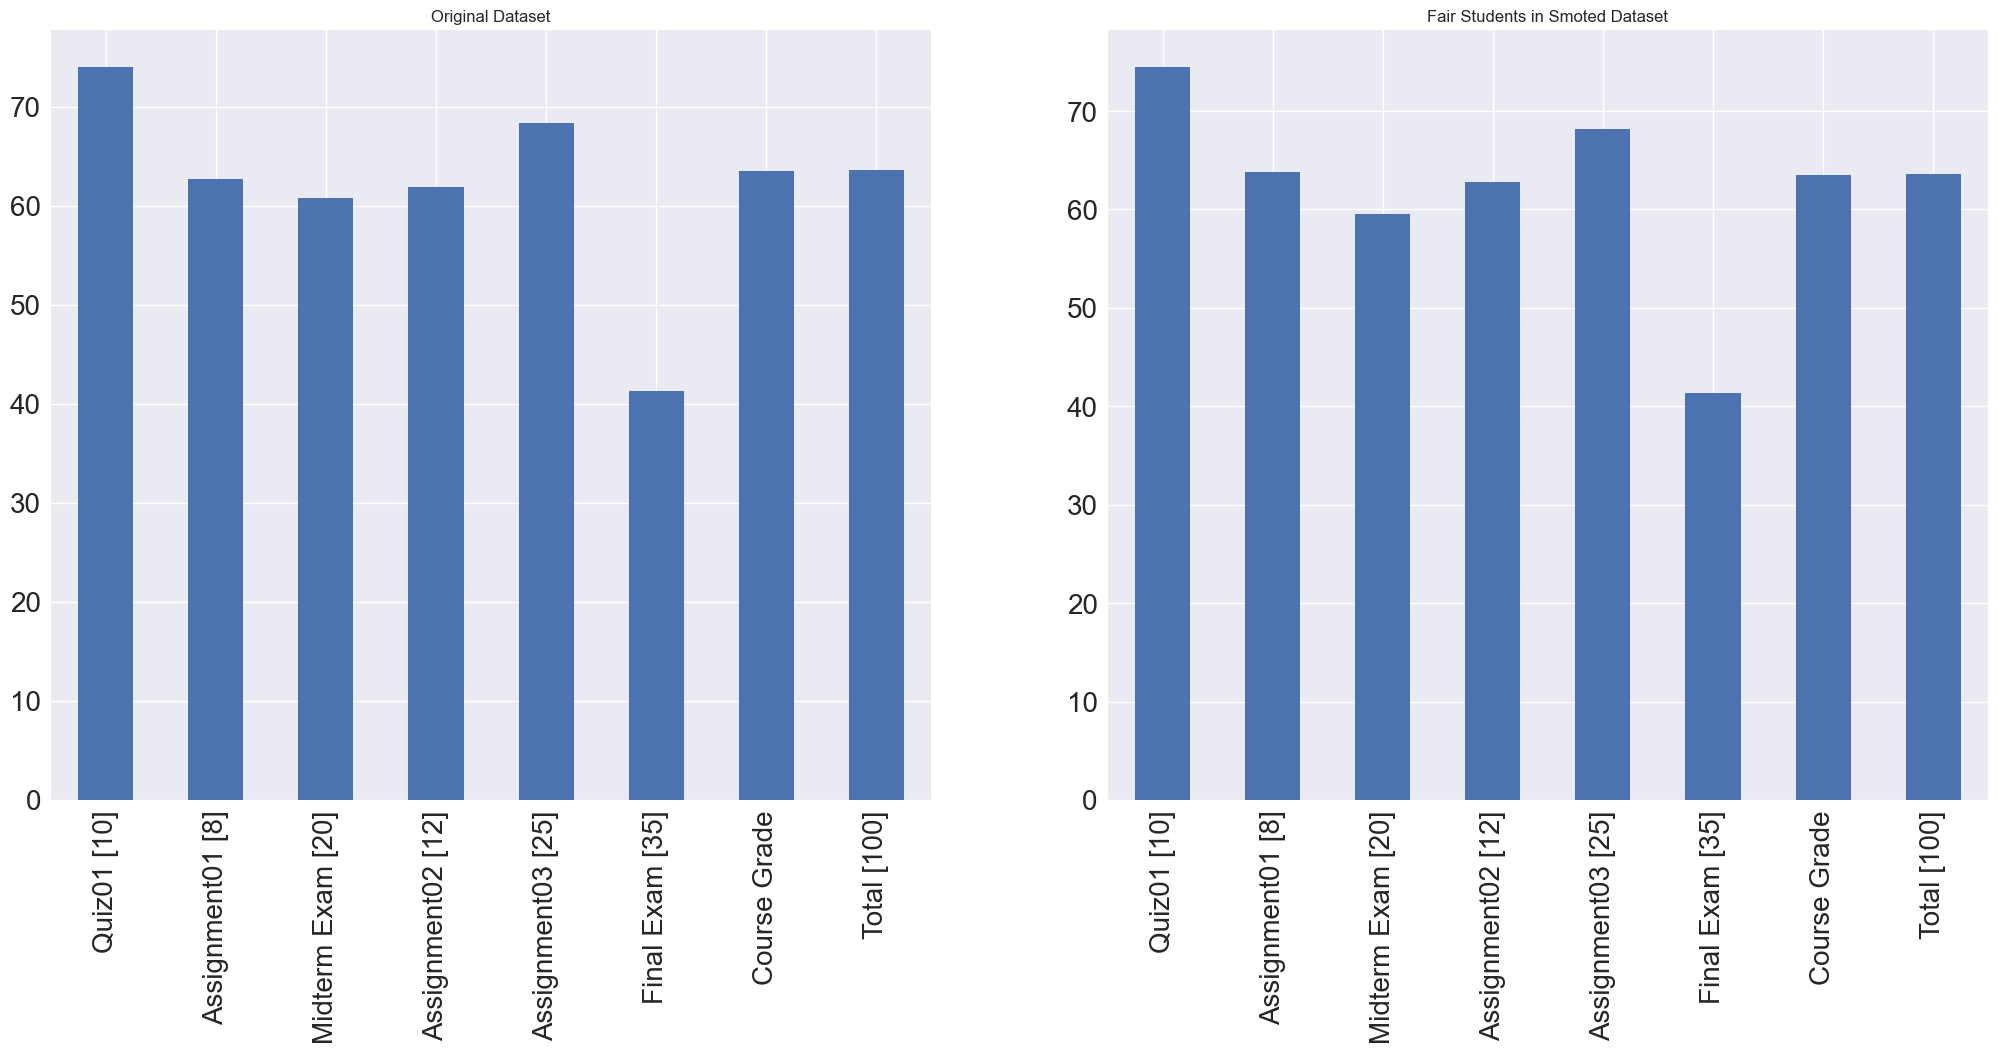

In [328]:
fig, ax = plt.subplots(1,2, figsize=(25,10))
dfClass_F.mean().plot(kind='bar',ax=ax[0],title="Original Dataset",fontsize=20);
df_SMOTED[df_SMOTED["Class"]=="F"].mean().plot(kind='bar',ax=ax[1],title="Fair Students in Smoted Dataset",fontsize=20);

C:\Users\Nobita\AppData\Local\Temp\ipykernel_15864\562559563.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfClass_W.mean().plot(kind='bar',ax=ax[0],title="Original Dataset",fontsize=20);
C:\Users\Nobita\AppData\Local\Temp\ipykernel_15864\562559563.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_SMOTED[df_SMOTED["Class"]=="W"].mean().plot(kind='bar',ax=ax[1],title="Week Students in Smoted Dataset",fontsize=20);


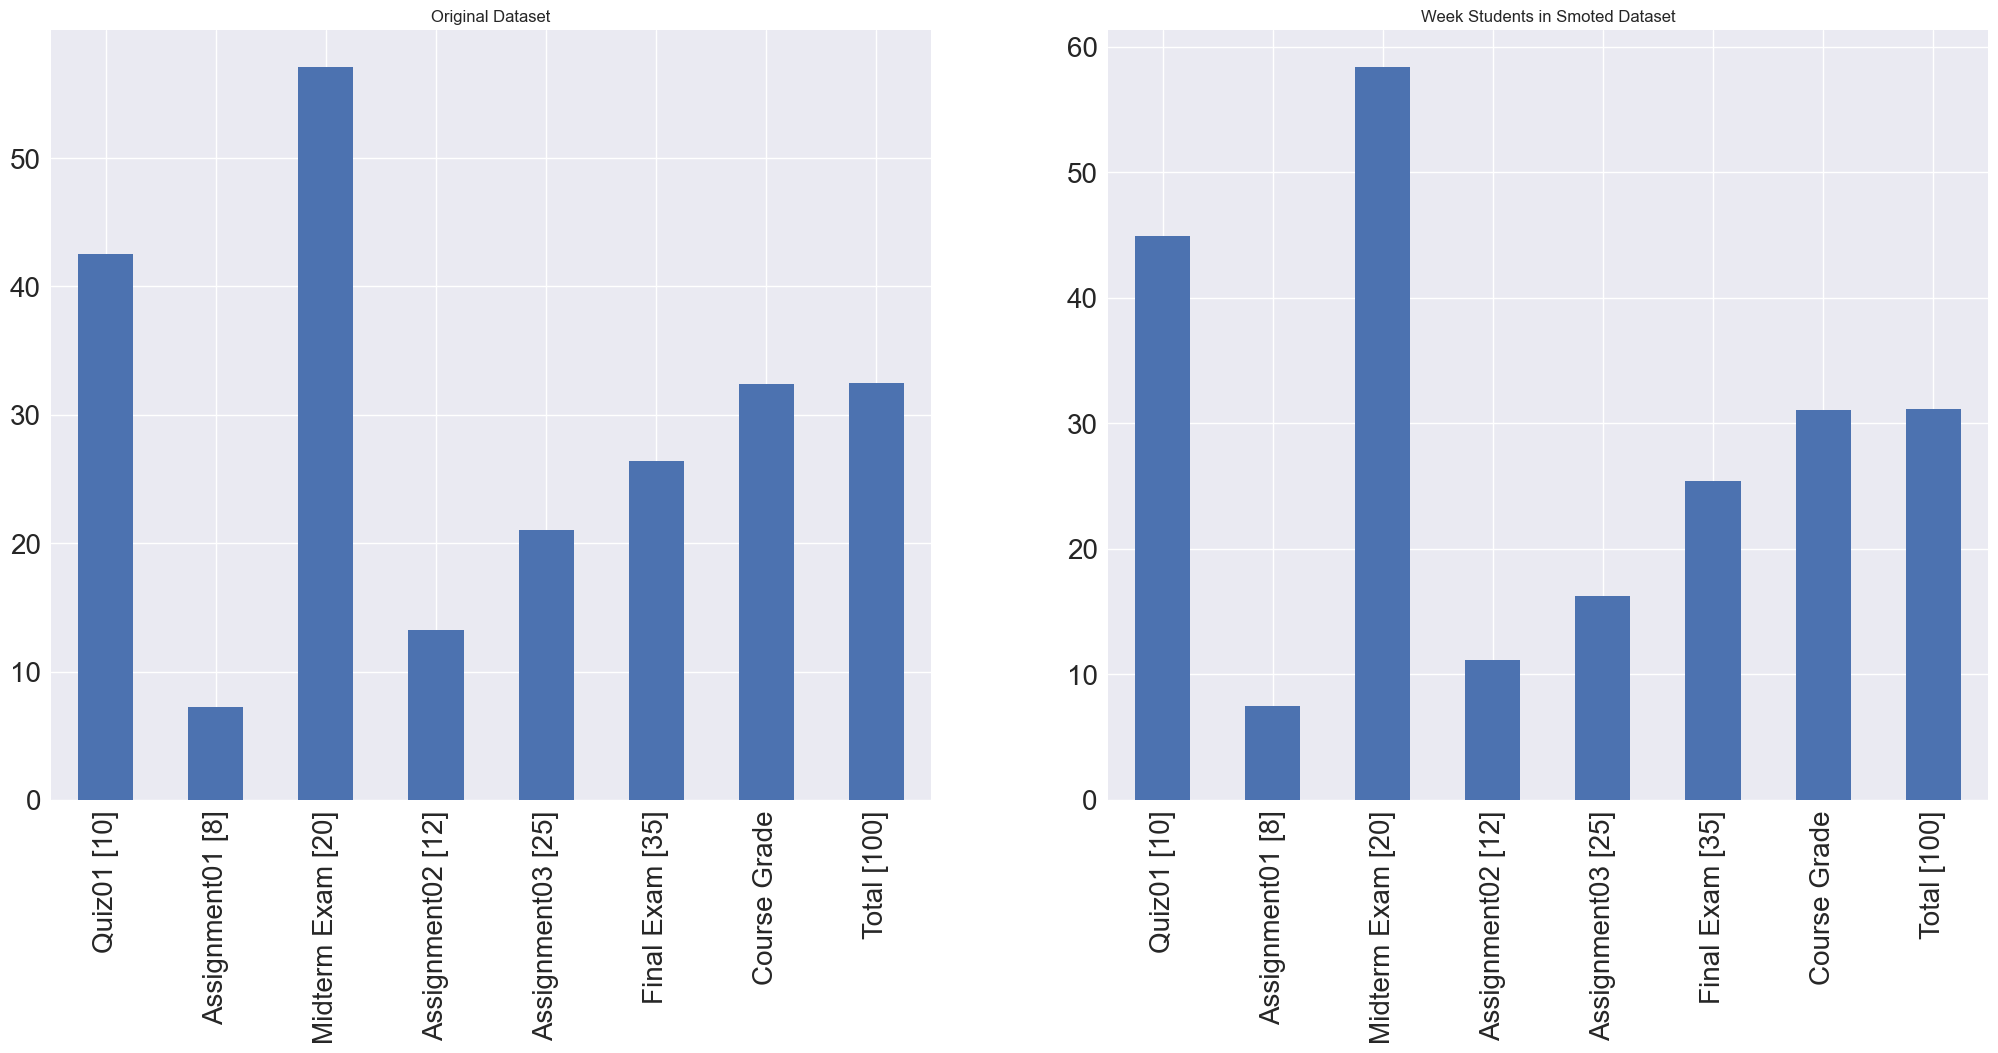

In [329]:
fig, ax = plt.subplots(1,2, figsize=(25,10))
dfClass_W.mean().plot(kind='bar',ax=ax[0],title="Original Dataset",fontsize=20);
df_SMOTED[df_SMOTED["Class"]=="W"].mean().plot(kind='bar',ax=ax[1],title="Week Students in Smoted Dataset",fontsize=20);

### `Range of mean of features is very similar.`

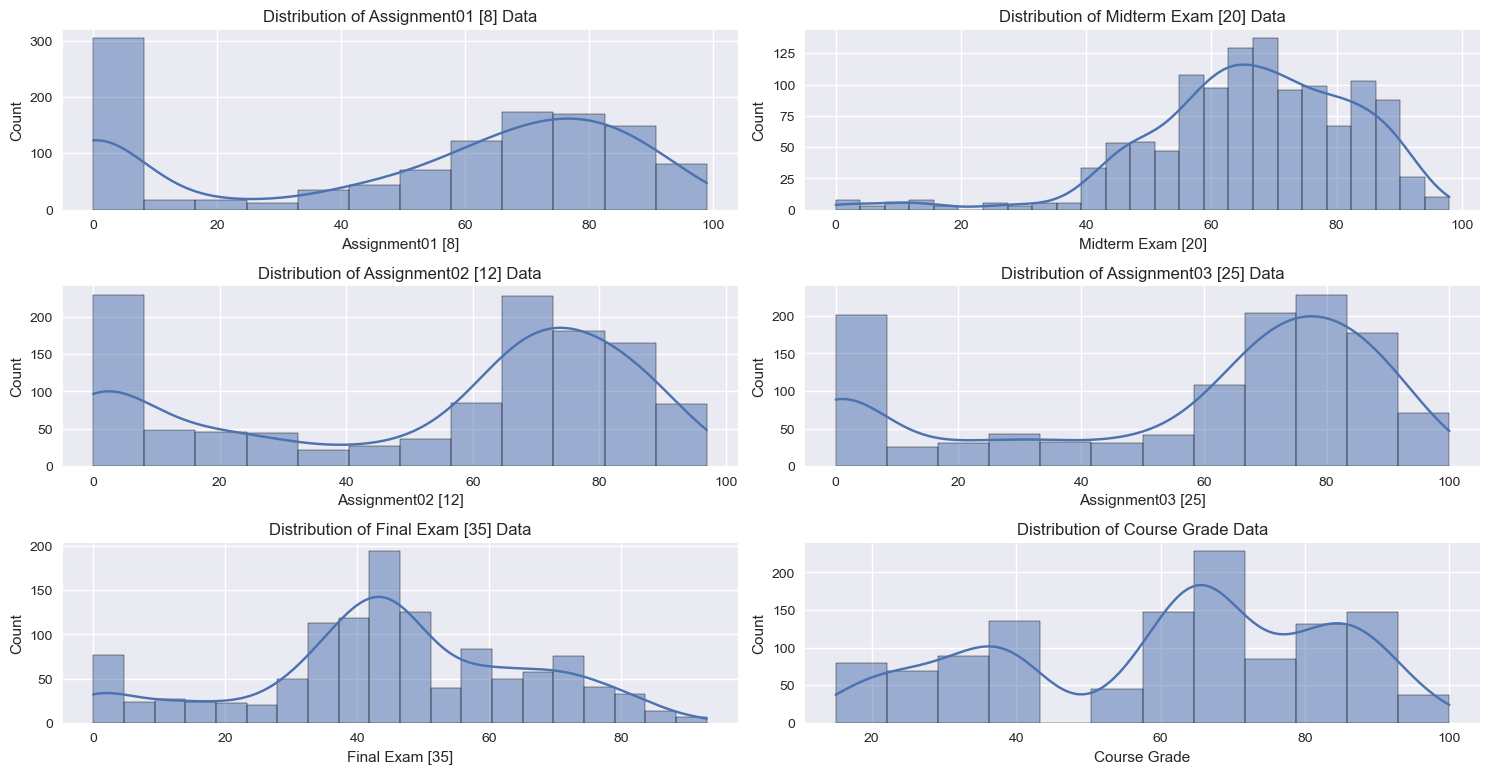

In [493]:
# Distribution of data new balanced dataset
X = df_SMOTED.iloc[:,[1,2,3,4,5,6]]
plt.figure(figsize=(15,10))
for i,col in enumerate(X.columns,1):
    plt.subplot(4,2,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(X[col],kde=True)
    plt.tight_layout()
    plt.plot()

<AxesSubplot:xlabel='Assignment01 [8]', ylabel='Assignment03 [25]'>

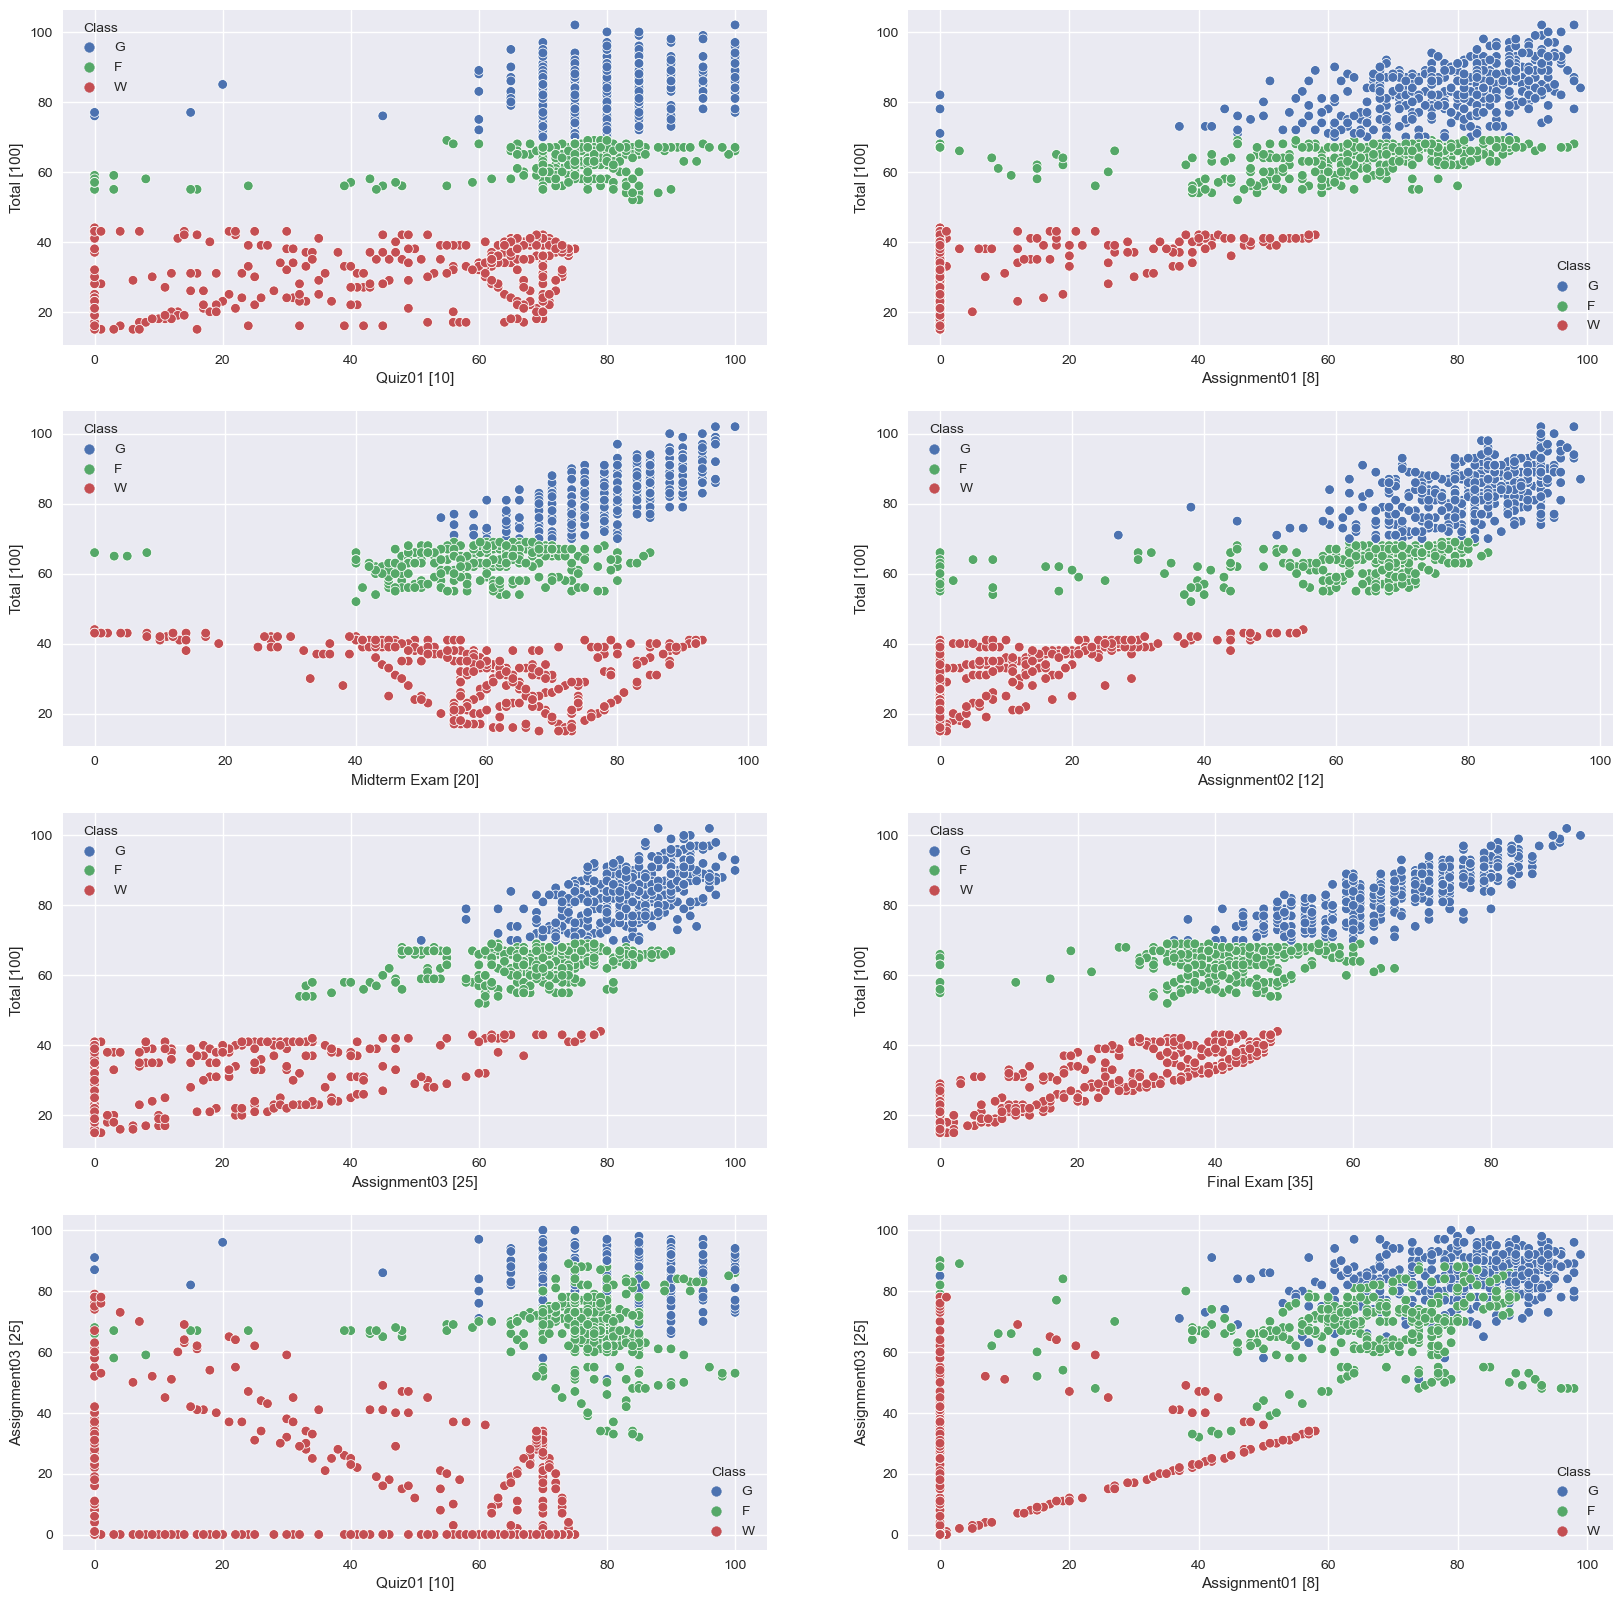

In [495]:
fig, ax = plt.subplots(4,2, figsize=(20,20))
sns.scatterplot(data = df_SMOTED, x ='Quiz01 [10]', y = 'Total [100]', hue = 'Class',ax=ax[0,0])
sns.scatterplot(data = df_SMOTED, x ='Assignment01 [8]', y = 'Total [100]', hue = 'Class',ax=ax[0,1]) 
sns.scatterplot(data = df_SMOTED, x ='Midterm Exam [20]', y = 'Total [100]', hue = 'Class',ax=ax[1,0]) 
sns.scatterplot(data = df_SMOTED, x ='Assignment02 [12]', y = 'Total [100]', hue = 'Class',ax=ax[1,1])
sns.scatterplot(data = df_SMOTED, x ='Assignment03 [25]', y = 'Total [100]', hue = 'Class',ax=ax[2,0])
sns.scatterplot(data = df_SMOTED, x ='Final Exam [35]', y = 'Total [100]', hue = 'Class',ax=ax[2,1]) 
sns.scatterplot(data = df_SMOTED, x ='Quiz01 [10]', y = 'Assignment03 [25]', hue = 'Class',ax=ax[3,0])
sns.scatterplot(data = df_SMOTED, x ='Assignment01 [8]', y = 'Assignment03 [25]', hue = 'Class',ax=ax[3,1])

<div class="alert alert-block alert-info">
<b style="font-size:20px"> 2- Grid Search </b> </div>

In [507]:
X = df_SMOTED.iloc[:,:-1].values
X_50=df_SMOTED.iloc[:, 0:4].values
X_20=df_SMOTED.iloc[:, 0:2].values
y = df_SMOTED['Class'].values

In [508]:
x_train, x_test, y_train, y_test = train_test_split(X_50, y, test_size=0.2,random_state=0)

In [528]:
# 'hidden_layer_sizes':[(1,1,2,3),(3,1,2,3),(5,1,2,3),(6,1,2,3),(7,1,2,3),(8,1,2,3,4)] 
parameters = {
    'hidden_layer_sizes':[(7,1,2,3)], 
    'random_state':[i for i in range(0,100)]
}
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.best_params_)

0.9077568134171907
{'hidden_layer_sizes': (7, 1, 2, 3), 'random_state': 72}


C:\Users\Nobita\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [537]:
y_pred = clf.predict(x_test)

In [538]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9288702928870293


In [531]:
clf.score(x_test, y_test)

0.9288702928870293

In [539]:
pd.crosstab(y_test,y_pred)

col_0,F,G,W
row_0,,,
F,71,5,2
G,10,69,0
W,0,0,82
